![image](https://drive.google.com/uc?export=view&id=1Ugk24FB0FcMahW9jSEdIRPSZUoOUYnGy)


Autor: Angel Ricardo Sánchez Zeferino 

Implementación computacional del método de difetencias finitas en el dominio del tiempo tomando como referencia el trabajo de Schneider de la Universidad Estatal de Washintgon [1]

#**Capítulo 3**

## 3.1  Introducción
Considere la expansión de la función $f(x)$ en serie de Taylor expandida en un punto $x_{0}$ con un desplazamiento de $ \delta/2$

$
f(x_{0} + \dfrac{\delta}{2}) = f(x_{0}) + \dfrac{\delta}{2} f'(x_{0}) + \dfrac{1}{2!} (\dfrac{\delta}{2})^{2} f''(x_{0}) + \dfrac{1}{3!}  (\dfrac{\delta}{2})^{3} f'''(x_{0}) + ... \ \ \ (3.1.1)$


$
f(x_{0} - \dfrac{\delta}{2}) = f(x_{0}) - \dfrac{\delta}{2} f'(x_{0}) + \dfrac{1}{2!} (\dfrac{\delta}{2})^{2} f''(x_{0}) - \dfrac{1}{3!}  (\dfrac{\delta}{2})^{3} f'''(x_{0}) + ... \ \ \ (3.1.2)$

Al restar (3.1.2) de (3.1.1) se obtiene 


$
f(x_{0} + \dfrac{\delta}{2}) - f(x_{0} - \dfrac{\delta}{2}) = \delta f'(x_{0}) + \dfrac{2}{3!} (\dfrac{\delta}{2})^{3} f'''(x_{0}) + ... \ \ \ (3.1.3)$

Al dividir entre $\delta$

$
\dfrac{f(x_{0} + \dfrac{\delta}{2}) - f(x_{0} - \dfrac{\delta}{2})}{2}
 =  f'(x_{0}) + \dfrac{1}{3!} (\dfrac{\delta}{2})^{2} f'''(x_{0}) + ... \ \ \ (3.1.4)$


Reacomodando la espresión anterior se obtiene 

$
\left. \frac{f(x)}{dx} \right|_{x=x_{0}} = \frac{f(x_{0} + \dfrac{\delta}{2}) - f(x_{0} - \dfrac{\delta}{2})}{2} + O(\delta^{2})
 \ \ \ (3.1.5)$

Donde $O(\delta^{2})$ representa todos los términos que no se consideran de forma explicita. Si $\delta$ es suficientemente pequeño, se pueden ignorar los términos representados por $O(\delta^{2})$, de forma que la aporximación de la diferencia central es

$
\left. \frac{f(x)}{dx} \right|_{x=x_{0}} \approx \frac{f(x_{0} + \dfrac{\delta}{2}) - f(x_{0} - \dfrac{\delta}{2})}{2} 
 \ \ \ (3.1.6)$









## 3.2 El algoritmo de Yee

1. Reemplaza todas las derivadas en las leyes de Ampere y Faraday con diferencias finitas. Discretiza el espacio y el tiempo de tal forma que los campos electricos y magenticos esten escalonados en el espacio y el tiempo. 

2. Resolver la ecuación de diferencias resultante para obtener las ecuaciones de actualización que expresan los campos futuros (desconocidos) en términos de los campos pasados (conocidos).

3. Evalúa los campos magnéticos un paso temporal a la vez en el futuro,  de tal forma que ellos son ahora conocidos ( ahora ellos se convierten en los campos pasados) 

4. Evalúa los campos eléctricos un paso temporal a la vez en el futuro,  de tal forma que ellos son ahora conocidos ( ahora ellos se convierten en los campos pasados) 

5. Repite los dos pasos previos anteriores hasta que los campos sean obtenidos sobre la duración deseada.


## 3.3 Implementación computacional de la simulación de FDTD en una dimensión.


El objetivo de esta sección es implementar computacionalmente las ecuaciones de actualización tanto para el campo eléctrio $E$, el cual varia con respecto al eje $x$ teniendo unicamente componente $z$, $E_{z}(x)$, y para el campo magnético $H$ el cual  varia con respecto al eje $x$ y  unicamente tiene componente $y$, $H_{y}(x)$ (El campo magnético puede tener componentes diferentes de cero en la dirección $x$ y $z$, pero ellos serán estáticos). Al aplicar la ley de Faraday (unidades S.I. ) se deduce 

$
\mu \frac{\partial H_{y}}{\partial t} = \frac{\partial E_{z}}{\partial x}    \ \ \  (3.3.1)
$

mientras que al aplicar la ley de Ampere se obtiene

$
\epsilon \frac{\partial E_{z}}{\partial t} = \frac{\partial H_{y}}{\partial x}   \ \ \ (3.3.2)
$

Donde $\epsilon = \epsilon_{r} \epsilon_{0} $ y $\mu = \mu_{r} \mu_{0}$, $\epsilon_{0} = 8.854 \times 10^{-12} $ F/m, $\mu_{0} = 4 \pi \times 10^{-7} H/m$. La ecuación (3.3.1) se puede emplear para avanzar en el campo mangético en el tiempo, mientras que la ecuación (3.3.2) puede ser empleada para para avanzar el campo eléctrico (método del salto de rana).

El siguiente paso es reemplazar las derivadas (3.3.1) y (3.3.2) con diferencias finitas. Para hacer esto, el espacio y el tiempo necesitan ser discretizados, para ello se puede emplear la siguiente notación 

$
E_{z}(x,t) = E_{z}(m \Delta x, q \Delta t) = E_{z}^{q}[m]
$

$
H_{y}(x,t) = H_{y}(m \Delta x, q \Delta t) = H_{y}^{q}[m]
$

Cuando implementamos el algoritmo FDTD los índices espaciales se usan como índices del vector (array) mientras que índices temporales, que esencialmente es un parámetro global, no se muestra explicitamente para cada ubicación del campo. 



Al discretizar las derivadas mediante una aproximación por diferencia central O($\delta^{2}$), se obtiene para (3.3.1)

$
\mu (\frac{H_{y}^{q+1/2}[m+1/2]-H_{y}^{q-1/2}[m+1/2]}{\Delta t}) = \frac{E_{z}^{q}[m+1]-E_{z}^{q}[m]}{\Delta x} \ \ \ (3.3.3)
$

y para (3.3.2)

$
\epsilon (\frac{E_{z}^{q+1}[m]-E_{z}^{q}[m]}{\Delta t}) = \frac{H_{y}^{q+1/2}[m+1/2]-H_{y}^{q+1/2}[m-1/2]}{\Delta x} \ \ \ (3.3.4)
$

Despejando para los campos (valores futuros) se tiene de (3.3.3) 

$
H_{y}^{q+1/2}[m+1/2] = H_{y}^{q-1/2}[m+1/2] + \frac{\Delta t}{\mu \Delta x} (E_{z}^{q}[m+1]-E_{z}^{q}[m]) \ \ \ (3.3.5)
$

tomando como referencia el siguiente esquema 

![image](https://drive.google.com/uc?export=view&id=1CLN5rKUMJWkiVdy4Lnautru6CbFSzfAf)

mientras que para (3.3.4) 


$
E_{z}^{q+1}[m] = E_{z}^{q}[m] + \frac{\Delta t}{\epsilon \Delta x} (H_{y}^{q+1/2}[m+1/2]-H_{y}^{q+1/2}[m-1/2]) \ \ \ (3.3.6)
$


tomando como referencia el siguiente esquema 

![image](https://drive.google.com/uc?export=view&id=1TZMZ9nnxGzL0nSu50fOX7RJEC5FpFvFq)
Se pueden reescribir los coeficientes que multiplican a los campos electromagneticos 

$
\frac{1}{\epsilon} \frac{\Delta t}{\Delta x} = \frac{\eta_{0}}{\epsilon_{r}}S_{c}
$

y 


$
\frac{1}{\mu} \frac{\Delta t}{\Delta x} = \frac{1}{\mu_{r} \eta_{0}}S_{c}
$

con $\eta_{0} = \sqrt{\mu_{0}/\epsilon_{0}}$ y $S_{c} = \frac{c \Delta t}{\Delta x}$

En simulaciones mediante FDTD existen restricciones en que tan largo puede ser tomado un paso temporal. Si es muy largo el algoritmo produce resultados inestables (los resultados no tienen sentido y tienden rápidamente a infinito. Pensando en la red FDTD, es lógico suponer que la energía que se propaga no es capaz de viajar más lejos que un paso espacial por cada paso temporal $c \Delta t \leqslant \Delta x  $ debido a que en el algoritmo FDTD cada nodo afecta únicamente a sus vecinos más cercanos. La proporción óptima para el número de Courant (minimizar errores) es también la relación máxima. Para este caso unidimensional  $S_{c} = 1$

Para poder actualizar las ecuaciones de los campos, es posible imaginar que lso campos se encuentran sobre un mismo eje, pero con un desfase de medio paso temporal como se muestra en el diagrama

![image](https://drive.google.com/uc?export=view&id=17nZY6vcbVjHV3NY5EXesT8sKQfcAIWPi)



## 3.4 Implementación computacional de una simulación FDTD unidimensional

Para implementar computacionalmente los nodos de los campos eléctricos, se asume el desfase temporal antes mencionado, de tal forma que solo se utilizen los índices de los nodos espaciales mediante números enteros como se muestra en el siguiente diagrama



![image](https://drive.google.com/uc?export=view&id=1saq3_cQTTXW3NQRkFbgCYeLaL_rn5SXZ)

Por lo tanto la ecuaciones (3.3.5) quedaria computacionalmente como 


```
hy[m] = hy[m] + (ez[m+1] -ez[m])/imp0
```

mientras que para la ecuación (3.3.6) 

```
ez[m] = ez[m] + imp0 ( hy[m] - hy[m-1])
```

Sin embargo debe consdierarse los siguiente en la simulación 


1. El espacio físico no tiene nodos vecinos en un lado. Por ejemplo no hay nodo hy[-1] para el nodo ez[0] para usar la ecuación de actualización. Por lo tanto no se puede emplear la ecuación de actualización estándar para estos nodos. 

2. Una sola impedancia puede ser usada, así que solo es posible modelar un medio homogeneo ( en el caso de espacio libre)

3. Si los campos son inicialmente cero, ellso permaneceran asi para siempre. 









## 3.5 Estructura de la simulación

In [ ]:
# Importando las librerias necesarias 

import numpy as np              #  Manejo de arrays
import math as mh               #  Funciones matermaticas
import matplotlib.pyplot as plt #  Creación de gráficos

In [ ]:
timec = 200                      # timec pasos temporales
Time= np.arange(0,timec,1)       # crea un vector con indices desde 0 hasta timec-1, en total timec valores
                                 # es decir ([val1, val2, ..., valtimec] -> [ind0, ind1, ..., indtimec-1])
size = 200                       # size nodos para los campos eléctricos y magnéticos
imp0 = 377                       # impedancia del espacio vacío (ohm)
                                 # Inicialización de los campos electico y magnético en cero 
ez = np.zeros(size)              # creamos el vector del campo eléctrico con size valores (V/m)
hy = np.zeros(size)              # creamos el vector del campo magnético con size valores (H)
                                 # [val1, val2, ..., valsize] -> [ind0, ind1, ..., indsize-1]
ezwave = np.zeros((timec,size))  # Matriz que almacena los valores del campo eléctrico (V/m) actualizados
                                 # cada renglón almacena los valores del campo eléctrico para cada paso temoral, las 
                                 # dimensiones son timec X size
                                 # mientras que los índices son: renglón = (0,timec-1) X columna = (0,size-1)
hywave = np.zeros((timec,size))  # Lo mismo que para el campo eléctrico (unidades en Henries)
center = 30                      # Parámetros de la onda a simular 
width = 100

In [ ]:
# Implementación de las ecuaciones (3.3.5) y (3.3.6) introduciendo una onda Gaussiana
for t in Time:                            #   Para cada paso temporal realiza:
  for m in range(0,size-1):               #   para cada nodo en el campo magnético entre 0 y (size-1)-1
    hy[m] = hy[m] + (ez[m+1]-ez[m])/imp0  #   por ej. k = 0, hy[0] + (ez[1] - ez[0])/imp0  
                                          #   por ej. k = 198, hy[198] + (ez[199] - ez[198])/imp0
                                          #   se exlcuye el campo en el nodo hy[199], pues este careceria de vecino
                                          #   es decir si  k = 199, hy[199] + (ez[200] - ez[199])/imp0
                                          #   pero el campo eléctrico sólo llega hasta el nodo 199. Haciendo esto
                                          #   el nodo hy[199] permanece en cero todo el tiempo
  for m in range(1,size):                 #   para cada nodo en el campo eléctrico
    ez[m] = ez[m] + (hy[m]-hy[m-1])*imp0  #   por ej. k = 1, ez[1] + (hy[1] - hy[0])/imp0
                                          #   el nodo ez[0]  se exlcuye pues se inicializa en la siguiente línea
  ez[0] = mh.exp(-((t-center)**2)/width)  #   Nodo fuente, el pulso inicia en ez[0]
                                          #   Asigna a cada instante del tiempo un punto de la curva 
                                          #   de la exponencial centrada en center, mientras que el ancho 
                                          #   es controlado por width, mientras mayor sea mas ancha es la exponencial
  ezwave[t,:] = ez                        #   Almacena por cada paso temporal i, los valores de los nodos
                                          #   del campo eléctrico z
  hywave[t,:] = hy                        #   Almacena por cada i-esimo paso temporal, los valores de los k nodos 
                                          #   del campo magnético
  # a[renglon,columna]

In [ ]:
# Función para visualizar 

# Función que permite la visualización del valor de los campos eléctricos
# ez[m] o hy[m]     a diferentes instantes del tiempo 
# NumSnapshots      Número de capturas
# timec             Número de pasos temporales
# incremento        Intervalo de tiempo entre casa captura
# x                 Vector que sea el eje x, debe ser del tamaño de ez o hy
# wave              Matriz que almacena los valores de ez o hy
#                   Cada renglón es un paso temporal, mientras que 
#                   cada columna corresponde a un nodo espacial
# ancho             ancho para la imagen que contiene toda la figura
# alto              altura para la imagen que contiene toda la figura
# inferior          límite inferior del eje y
# superior          límite superior del eje y
# Font              tamaño de letra
# color             Color de línea
def graf(NumSnapshots,timec,x,wave,ancho,alto,inferior,superior,Font,color):
  Incremento = int(timec/NumSnapshots)
  fig, axs = plt.subplots(NumSnapshots, 1, sharex=True, figsize=(ancho,alto))
  fig.subplots_adjust(hspace=0)
  S = "s"
  my_dict = {} 
  for i in range(NumSnapshots):
    X = S + str(i) 
    my_dict[X] = wave[Incremento*i,:]
    axs[i].plot(x, my_dict[X],color)
    axs[i].set_yticklabels([])
    axs[i].set_ylim(inferior, superior)
    axs[i].set_ylabel(str(Incremento*i), rotation=0, fontsize=Font,labelpad=10)
    plt.xlabel('Espacio (índice espacial)',fontsize=Font,labelpad=10)
    
    
    #plt.show()
  return 




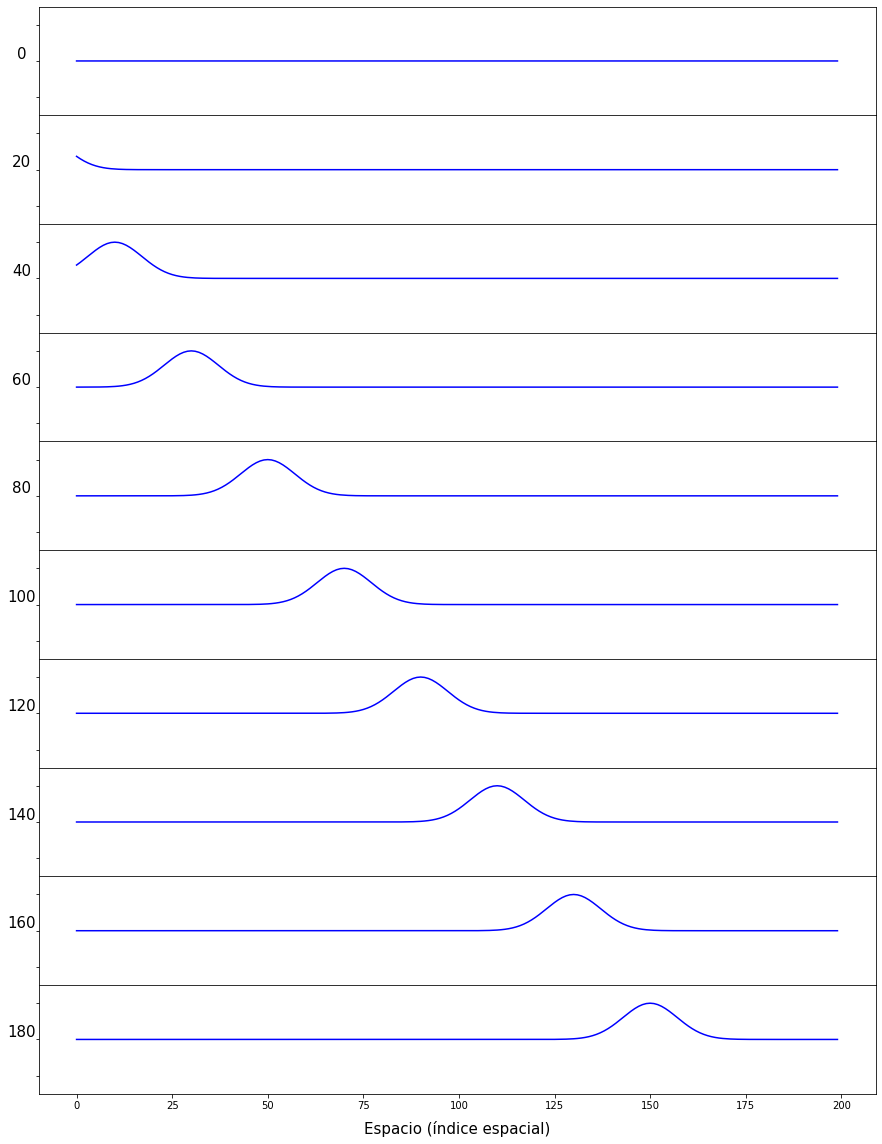

In [ ]:
NumSnapshots = 10
index = np.arange(0,size,1)
ancho = 15
alto = 20
miny = -1.5
maxy = 1.5
tamletra = 15
color = 'b'

graf(NumSnapshots,timec,index,ezwave,ancho,alto,miny,maxy,tamletra,color)

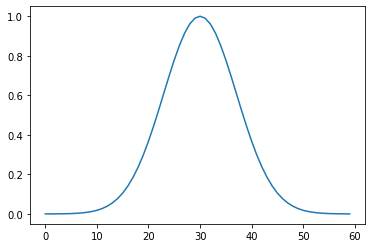

In [ ]:
# Pulso generado como fuente en el nodo ez[0]
x = np.arange(0,60,1)
y = np.zeros(60)
for i in range(0,60):
  y[i] = mh.exp(-((i-center)**2)/width)
plt.plot(x,y)

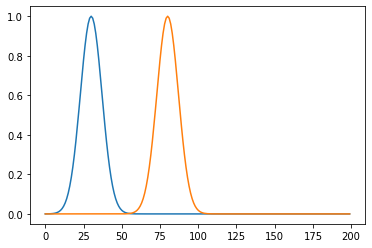

In [ ]:
# Fijandonos en los cambios de un nodo del campo eléctrico en el tiempo 
plt.plot(time,ezwave[:,0])
plt.plot(time,ezwave[:,50])

In [ ]:
nodomax = np.where(ezwave[:,0] == max(ezwave[:,0]))
nodomax2 = np.where(ezwave[:,50] == max(ezwave[:,50]))
nodomax,nodomax2

((array([30]),), (array([80]),))

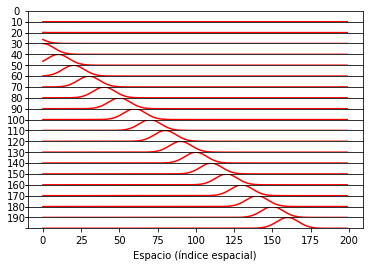

In [ ]:
# Visualización campo eléctrico en diferentes instantes del tiempo 
NumSnapshots = 20
index = np.arange(0,size,1)

Increment = int(timec/NumSnapshots)
fig, axs = plt.subplots(NumSnapshots, 1, sharex=True)
fig.subplots_adjust(hspace=0)

S = "s"
my_dict = {}
for i in range(NumSnapshots):
  X = S + str(i) 
  my_dict[X] = ezwave[Increment*i,:]
  axs[i].plot(index, my_dict[X],'r')
  axs[i].set_yticklabels([])
  axs[i].set_ylim(0, 1)
  axs[i].set_ylabel(str(Increment*i), rotation=0, fontsize=10)
plt.xlabel('Espacio (índice espacial)')
plt.show()

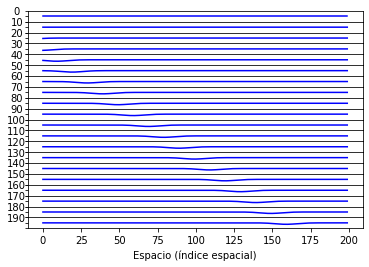

In [ ]:
# Visualización campo magnético
NumSnapshots = 20
index = np.arange(0,size,1)

Increment = int(200/NumSnapshots)
fig, axs = plt.subplots(NumSnapshots, 1, sharex=True)
fig.subplots_adjust(hspace=0)

S = "s"
my_dict = {}
for i in range(NumSnapshots):
  X = S + str(i) 
  my_dict[X] = hywave[Increment*i,:]
  axs[i].plot(index, my_dict[X],'b')
  axs[i].set_yticklabels([])
  axs[i].set_ylim(-.01, .01)
  axs[i].set_ylabel(str(Increment*i), rotation=0, fontsize=10)
plt.xlabel('Espacio (índice espacial)')
plt.show()

In [ ]:
# Función que permite la visualización del valor de los campos eléctricos
# en ez[m] o hy[m] a diferentes instantes del tiempo 
# NumSnapshots      Número de instantaneas
# timec             Número de pasos temporales
# x                 Vector que sea el eje x, debe ser del tamaño de ez o hy
# wave              Matriz que almacena los valores de ez o hy
#                   Por cada renglón es un paso temporal, mientras que 
#                   cada columna corresponde a un nodo espacial
# ancho             ancho para la imagen que contiene toda la figura
# alto              altura para la imagen que contiene toda la figura
# inferior          límite inferior del eje y
# superior          límite superior del eje y
# Font              tamaño de letra
# color             Color de línea
def graf(NumSnapshots,timec,x,wave,ancho,alto,inferior,superior,Font,color):
  Increment = int(timec/NumSnapshots)
  fig, axs = plt.subplots(NumSnapshots, 1, sharex=True,figsize=(ancho,alto))
  fig.subplots_adjust(hspace=0)
  S = "s"
  my_dict = {} 
  for i in range(NumSnapshots):
    X = S + str(i) 
    my_dict[X] = wave[Increment*i,:]
    axs[i].plot(x, my_dict[X],color)
    axs[i].set_yticklabels([])
    axs[i].set_ylim(inferior, superior)
    axs[i].set_ylabel(str(Increment*i), rotation=0, fontsize=Font,labelpad=10)
    plt.xlabel('Espacio (índice espacial)',fontsize=Font,labelpad=10)
    #plt.show()
  return 


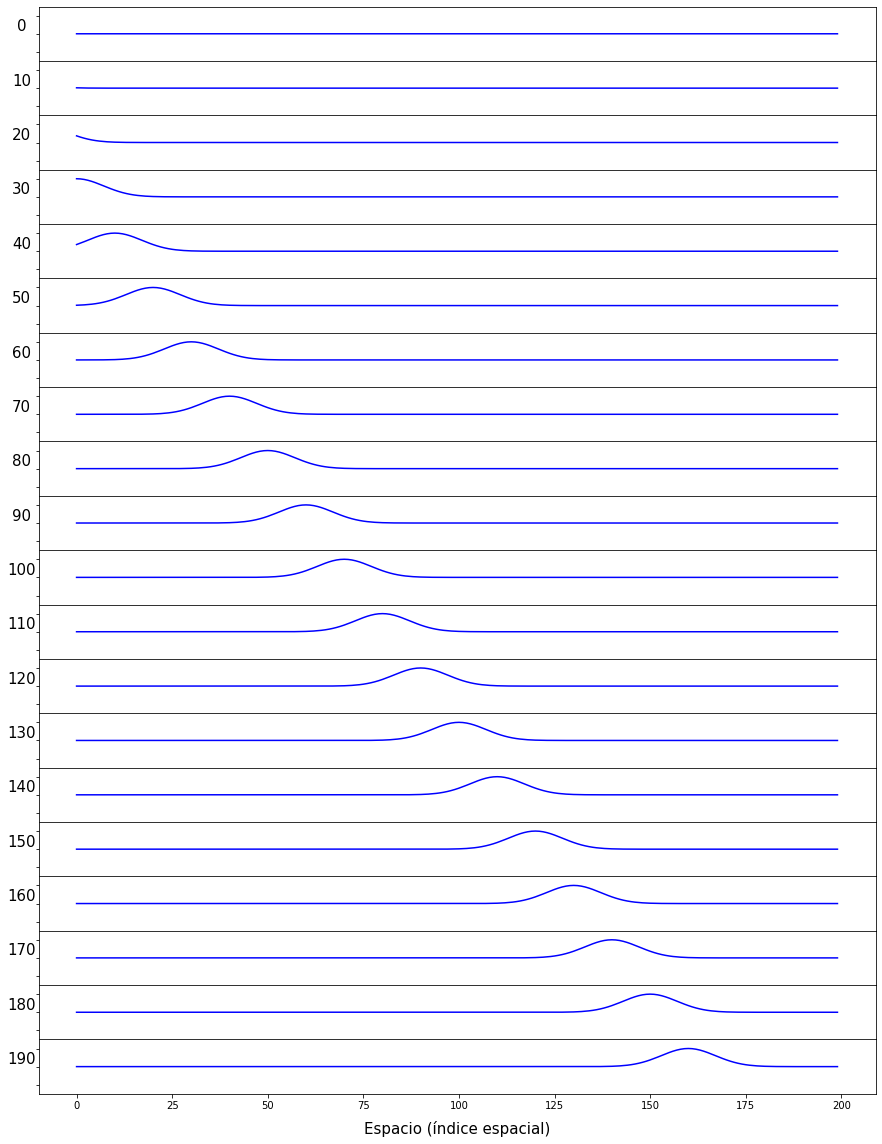

In [ ]:
graf(NumSnapshots,timec,index,ezwave,15,20,-1.5,1.5,15,'b')

Cuando se emplean 1,000 pasos temporales en lugar de 250 en la simulación anterior ``` timec = 1000```. ¿Por que hay múltiples picos y por que hay tanto positivos como negativos?.

El último nodo del campo magnético en la red es inicialemnte cero y permanecen en cero a traves de toda la simulación. Cuando el campo se encuentra con este nodo lo que ve es un conductor magnético perfecto (PMC). Para satisfacer las condiciones de frontera en este nodo, es decir que el campo magnético total se hace cero, por lo tanto la onda reflejada creada invierte el signo del campo magnético pero mantiene el signo del campo eléctrico. Esta onda reflejada continua viajando en la dirección negativa hasta que este se encuentra con el primer nodo del campo eléctrico ``` ez[0] ```. Este nodo tiene sus valor de acuerdo a la función fuente. Cuando el campo alcanza este nodo la función fuente tiene ahora un valor de cero, asi que el nodo ``` ez[0] ``` se comporta como un conductor eléctrico perfecto (PEC)








In [ ]:
# Empleando más pasos en el tiempo
timec = 1000                     # 200 pasos temporales
time= np.arange(0,timec,1)       # crea un vector con valores desde 0 hasta 199
size = 200                       # 200 nodos para los campos eléctricos y magnéticos
imp0 = 377                       # impedenacia del espacio vacío
ez = np.zeros(size)              # creamos el vector del campo eléctrico con 200 valores
hy = np.zeros(size)              # creamos el vector del campo magnético con 200 valores
ezwave = np.zeros((timec,size))  # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size))  # por cada paso temporal existe un renglon, por cada nodo existe una columna
center = 30
width = 100

for i in time:                            #   Para cada paso temporal realiza:
  for k in range(0,size-1):               #   para cada nodo en el campo magnético entre 0 y (size-1)-1
    hy[k] = hy[k] + (ez[k+1]-ez[k])/imp0  #   por ej. k = 0, hy[0] + (ez[1] - ez[0])/imp0  
                                          #   por ej. k = 198, hy[198] + (ez[199] - ez[198])/imp0
                                          #   se exlcuye el campo en el nodo hy[199], pues este careceria de vecino
                                          #   es decir si  k = 199, hy[199] + (ez[200] - ez[199])/imp0
                                          #   pero el campo eléctrico sólo llega hasta el nodo 199. Haciendo esto
                                          #   el nodo hy[199] permanece en cero todo el tiempo
  for k in range(1,size):                 #   para cada nodo en el campo eléctrico
    ez[k] = ez[k] + (hy[k]-hy[k-1])*imp0  #   por ej. k = 1, ez[1] + (hy[1] - hy[0])/imp0
                                          #   el nodo ez[0]  se exlcuye pues se inicializa en la siguiente línea
  ez[0] = mh.exp(-((i-center)**2)/width)  #   Nodo fuente, el pulso inicia en ez[0]
                                          #   Asigna a cada instante del tiempo un punto de la curva 
                                          #   de la exponencial centrada en center, mientras que el ancho 
                                          #   es controlado por width, mientras mayor sea mas ancha es la exponencial
  ezwave[i,:] = ez                        #   Almacena por cada paso temporal i, los valores de los nodos
                                          #   del campo eléctrico z
  hywave[i,:] = hy                        #   Almacena por cada paso temporal i, los valores de los nodos k
                                          #   del campo magnético y
  # a[renglon,columna]

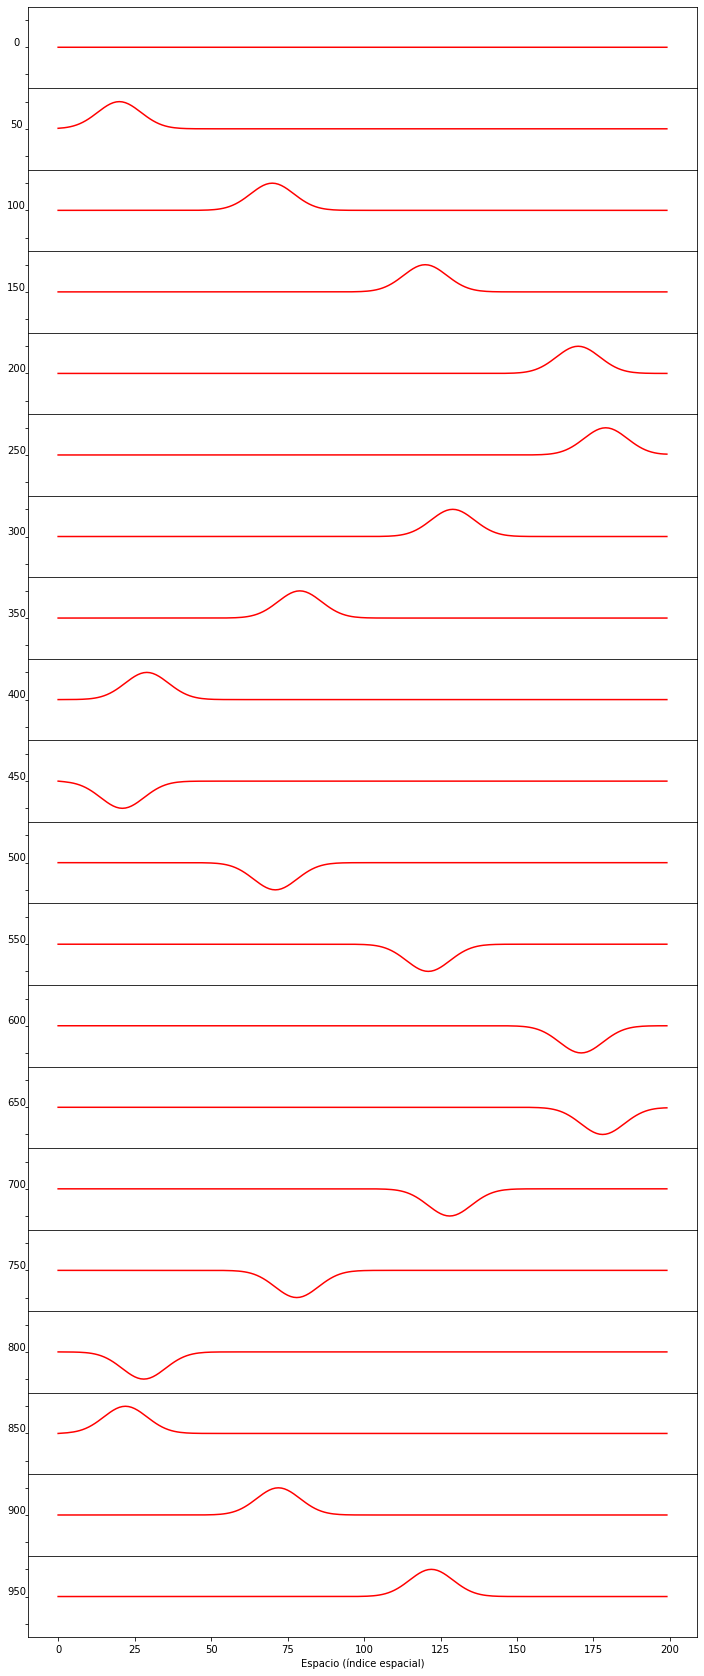

In [ ]:
# Visualización campo eléctrico en diferentes instantes del tiempo 
NumSnapshots = 20
index = np.arange(0,size,1)

Increment = int(timec/NumSnapshots)
fig, axs = plt.subplots(NumSnapshots, 1, sharex=True,figsize=(12,30))
fig.subplots_adjust(hspace=0)

S = "s"
my_dict = {}
for i in range(NumSnapshots):
  X = S + str(i) 
  my_dict[X] = ezwave[Increment*i,:]
  axs[i].plot(index, my_dict[X],'r')
  axs[i].set_yticklabels([])
  axs[i].set_ylim(-1.5, 1.5)
  axs[i].set_ylabel(str(Increment*i), rotation=0, fontsize=10)
plt.xlabel('Espacio (índice espacial)')
plt.show()

# Decripción de la imagen 
# Como se mencionó, el nodo 199 del campo magéntico es cero durante toda la ejecuación del programa
# cuando el campo ve este nodo, lo que observa es un conductor magéntico perfecto (PMC). Por lo tanto, para
# satisfacer la condición de frontera en este nodo, se crea una unda reflejada que invierte el signo del campo 
# magnético (ver gráfico abajo), pero conserva el signo del campo eléctrico.
# El segundo pico es la onda reflejada, la cual se mueve
# en la dirección negativa hasta encontrar el nodo fuente ez[0], debido a que este nodo se ha ido a zero, lo que 
# la onda observa es un conductor eléctrico perfecto, entonces para satisfacer las condiciones de frontera, debe invertir
# el signo de la onda, mientras que el campo mágnetico consrva su signo y se refleja.

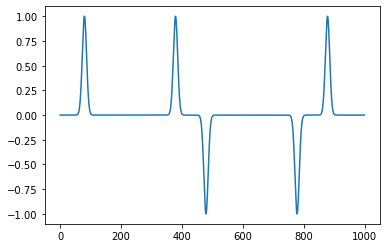

In [ ]:
plt.plot(time,ezwave[:,50])


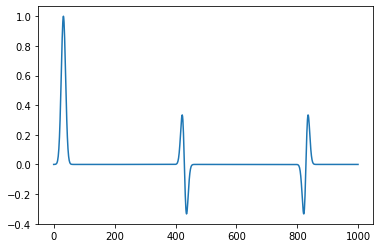

In [ ]:
plt.plot(time,ezwave[:,2])

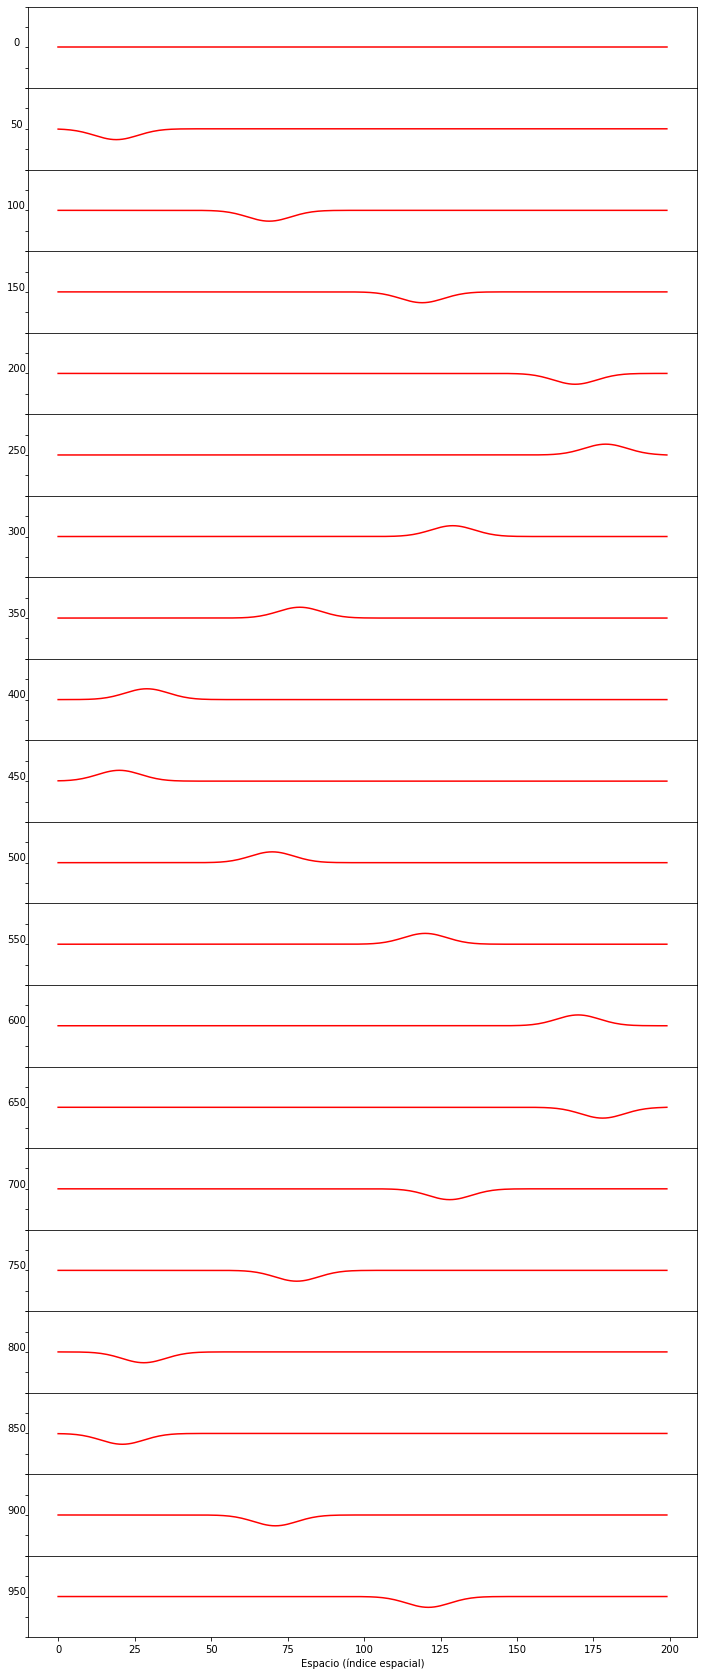

In [ ]:
# Visualización campo eléctrico en diferentes instantes del tiempo 
NumSnapshots = 20
index = np.arange(0,size,1)

Increment = int(timec/NumSnapshots)
fig, axs = plt.subplots(NumSnapshots, 1, sharex=True,figsize=(12,30))
fig.subplots_adjust(hspace=0)

S = "s"
my_dict = {}
for i in range(NumSnapshots):
  X = S + str(i) 
  my_dict[X] = hywave[Increment*i,:]
  axs[i].plot(index, my_dict[X],'r')
  axs[i].set_yticklabels([])
  axs[i].set_ylim(-0.01, 0.01)
  axs[i].set_ylabel(str(Increment*i), rotation=0, fontsize=10)
plt.xlabel('Espacio (índice espacial)')
plt.show()

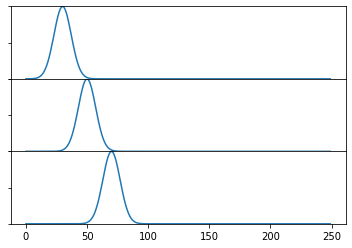

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(time, s1)
axs[0].set_yticklabels([])
#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(0, 1)

axs[1].plot(time, s2)
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_yticklabels([])
axs[1].set_ylim(0, 1)

axs[2].plot(time, s3)
axs[2].set_yticklabels([])
#axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(0, 1)

plt.show()


# 3.8 Fuente aditiva

Los programas desarrollados anteriormente tienen la desventaja de que la energía no puede pasar por el nodo origen. Este problema puede ser corregido añadiendo una fuente aditiva. 

Considerando la ley de Ampere con el término de densidad de corriente 

$\nabla \times \vec{H} = \vec{J} + \epsilon \dfrac{\partial \vec{E}}{\partial t}$

La densidad de corriente $\vec{J}$ representa tanto la corriente de conducción debida al flujo de carga en un material sobre la influencia del campo eléctrico, es decir una corriente dada por $\sigma \vec{E} $ asi como una corriente asociada con una fuente "corriente suministrada". Por ahora nos centramos en el aspecto de fuente de $\vec{J}$. Reordenando

$ \dfrac{\partial \vec{E}}{\partial t} = \dfrac{1}{\epsilon} \nabla \times \vec{H} -\dfrac{1}{\epsilon} \vec{J} $

Esta expresión da la derivada temporal del campo eléctrico en términos de una derivada espacial del campo magnético (como antes) y un término adicional que puede ser pensado como la función fuerza del sistema.

Aplicando las diferencias finitas en el punto del espacio y tiempo $(m \Delta x, (q+1/2)\Delta t)$ y resolviendo para el campo eléctrico en el futuro


$
E_{z}^{q+1}[m] =  E_{z}^{q}[m] + \dfrac{\Delta t}{\epsilon \Delta x} (H_{y}^{q+1/2}[m + 1/2 ]-H_{y}^{q+1/2}[m - 1/2 ]) - \dfrac{\Delta t}{\epsilon} J_{z}^{q+1/2}[m]
$

Se puede reorganizar esta última expresión como 


$
E_{z}^{q+1}[m] =  E_{z}^{q}[m] + \dfrac{\Delta t}{\epsilon \Delta x} (H_{y}^{q+1/2}[m + 1/2 ] -H_{y}^{q+1/2}[m - 1/2 ])
$

$
E_{z}^{q+1}[m] =E_{z}^{q+1}[m]  - \dfrac{\Delta t}{\epsilon} J_{z}^{q+1/2}[m]
$

Debido a que la fuente de corriente existe únicamente en un solo nodo en el caso de 1 dimensión, por lo que la útlima ecuación puede existir únicamente en un nodo



In [ ]:
# Fuente, 1D 
timec = 250
time= np.arange(0,timec,1)
size = 200 
imp0 = 377
index = np.arange(0,size,1)
ez = np.zeros(size)
hy = np.zeros(size)
ezwave = np.zeros((timec,size))  # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size))  # por cada paso temporal existe un renglon, por cada nodo existe una columna
center = 30
width = 100

for i in time:
  for k in range(0,size-1):
    hy[k] = hy[k] + (ez[k+1]-ez[k])/imp0 
  for k in range(1,size):
    ez[k] = ez[k] + (hy[k]-hy[k-1])*imp0
  ez[50] = ez[50] + mh.exp(-((i-center)**2)/width)  # Término fuente en el nodo con numero 50 [0, 1, ..., 49, 50, ..., 199]
  ezwave[i,:] = ez
  hywave[i,:] = hy

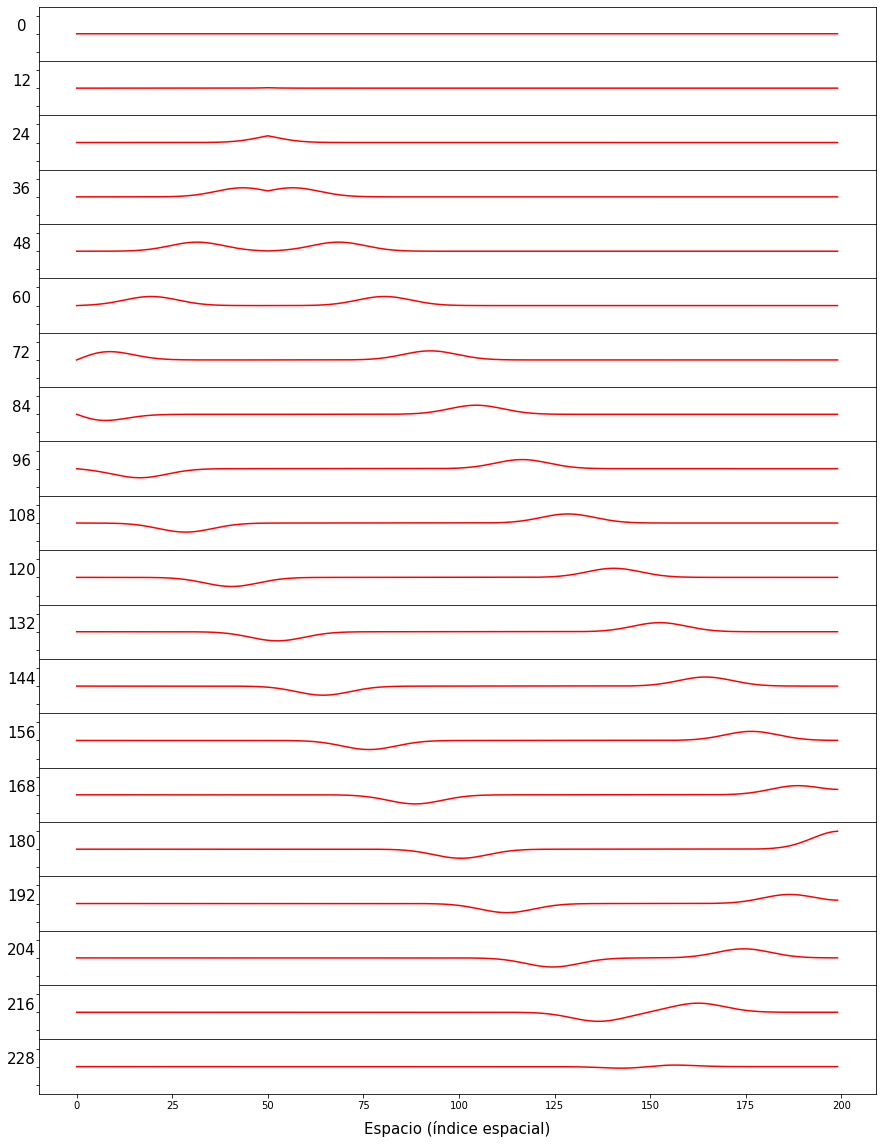

In [ ]:
# Visualización
graf(NumSnapshots,timec,index,ezwave,15,20,-1.5,1.5,15,'r')

# 3.9 Condiciones de frontera absorbente (ABC’s)

Pueden ser usadas de tal forma que la red, que solo contiene un número finito de nodos se pueda comportar como si este fuera infinito. Entre mejor sea la ABC, menos energía se reflejara al interior de la red.


In [ ]:
# Fuente y ABC

# Constantes
timec   = 250     # Pasos temporales
size    = 200     # Nodos espaciales
imp0    = 377     # Impedancia del espacio vacío
center  = 30      # Centro del pulso Gaussiano
width   = 100     # Controla el ancho del pulso Gaussiano
                  # Entre mayor sea, mas ancho sera el pulso

time= np.arange(0,timec,1)        # vector de pasos temporales start = 0, end = timec-1
index = np.arange(0,size,1)       # vector de nodos espaciales start = 0, end = size-1
ez = np.zeros(size)               # red de campo eléctrico 
hy = np.zeros(size)               # red de campo magnético
ezwave = np.zeros((timec,size))   # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size))   # por cada paso temporal existe un renglon, por cada nodo existe una columna



# Para modelar un dominio abierto donde no hay energía entrando a la red desde fuera, por lo tanto
# para el nodo ez[0] es actualizado de tal forma que toma el valor que tenia ez[1]. Debido a que no hay energía
# entrando a la red desde la izquierda, el campo en ez[1] debe propagarse solamente a la izquierda
# el mismo argumento debe usarse para actualizar el valor de hy[199]

for i in time:
  hy[size-1]=hy[size-2]                         # ABC para el campo magnético
  for k in range(0,size-1):
    hy[k] += (ez[k+1]-ez[k])/imp0
  ez[0]=ez[1]                                   # ABC para el campo eléctrico
  for k in range(1,size):
    ez[k] += (hy[k]-hy[k-1])*imp0
  ez[50] += mh.exp(-((i-center)**2)/width)      # Nodo fuente en ez[50]  
  ezwave[i,:] = ez
  hywave[i,:] = hy

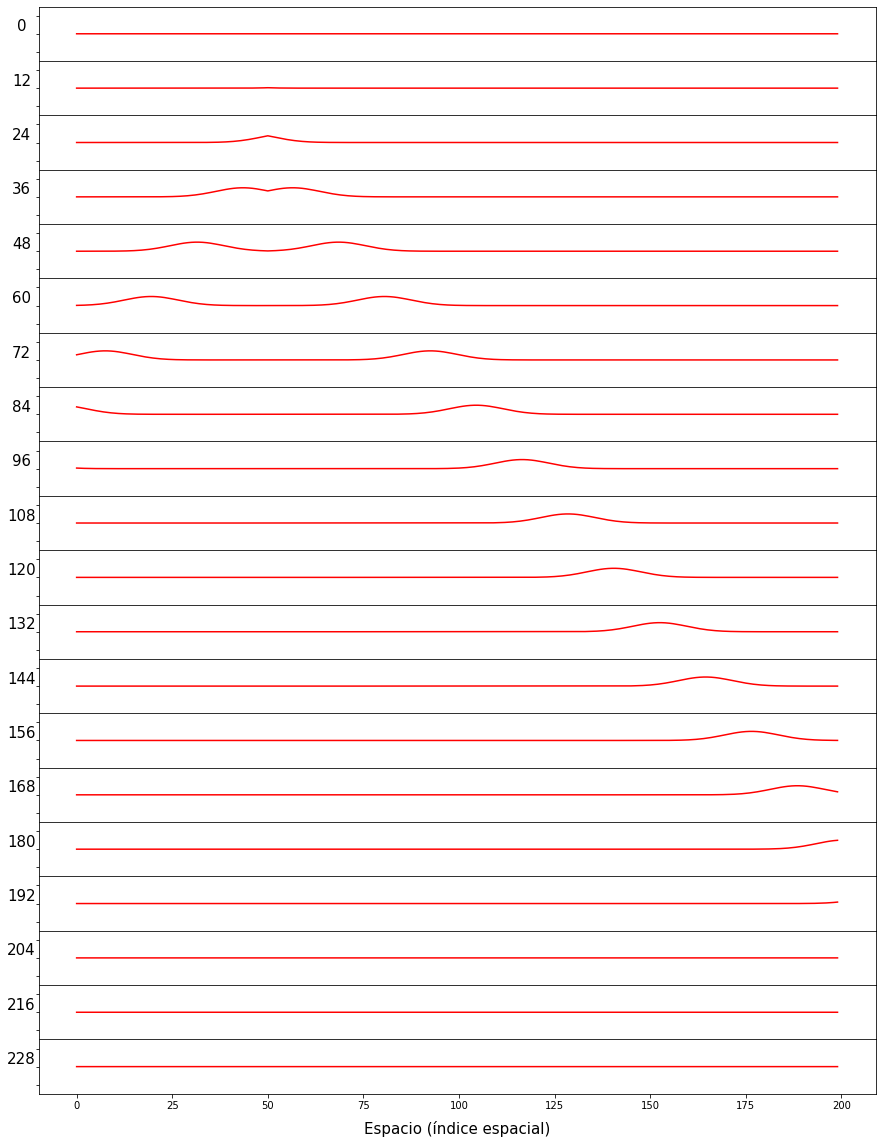

In [ ]:
# Visualización ABC 
graf(NumSnapshots,timec,index,ezwave,15,20,-1.5,1.5,15,'r')

#Límite de campo Total / Campo disperso

Ahora se construye una fuente tal que la excitación solo se propagué en una dirección. Por ejemplo la fuente introduce un campo incidente que solo se propaga a la derecha (dirección del eje $x$ positiva). 


Podemos usar un pulso Gaussiano, pero para obtener una onda que se mueva hacia la derecha, el argumento debe ser $t-x/c$ en lugar de $t$. Anteriormente se utilizo esta expresión


$
f(t) = f(q \Delta t) = e^{-(\dfrac{q \Delta t - 30 \Delta t  }{10 \Delta t})^{2}} = e^{-(\dfrac{q  - 30   }{10 })^{2}} = f[q]
$

Para el campo incidente que se propaga, $t$ es reemplazado con $t - x/c$, para un espacio y tiempo discretizado, el argumento es dado por

$t - x/c = q\Delta t- \dfrac{m \Delta  x}{c} = (q - \dfrac{m \Delta  x}{c \Delta t })\Delta t$ 

Si el número de Courant es la unidad

$t - x/c = q\Delta t- \dfrac{m \Delta  x}{c} = (q - \dfrac{m \Delta  x}{c \Delta t })\Delta t = (q -m) \Delta t$

Reemplazando el argumento de la función fuente 


$
E_{z}^{inc}[m,q] = e^{-(\dfrac{(q-m) \Delta t - 30 \Delta t  }{10 \Delta t})^{2}} = e^{-(\dfrac{(q  - m) - 30   }{10 })^{2}} 
$

Es decir el origen, $x = 0$ es en $m = 0$


El campo magéntico se obtiene dividiendo el campo eléctrico por la impedancia del medio. Adicionalmente para que $\vec{E}_{z}^{inc} \times \vec{H}_{y}^{inc}$ apunte en la dirección de movimiento

$
H_{y}^{inc} [m,q] =-\sqrt{\dfrac{\epsilon}{\mu}} E_{z}^{inc}[m,q] = \dfrac{1}{\eta} e^{-(\dfrac{(q  - m) - 30   }{10 })^{2}}
$


con $\eta = \sqrt{\dfrac{\mu}{\epsilon}}$

En la formulación TFSf el dominio computacional se divide en 2 regiones: (1) la región total de campo que contiene el campo incidente y además cualquier campo dispersado por frontera entre el campo total y las regiones del campo dispersado. Las ubicaciones de estas fronteras son un poco arbitrarias, pero normalmente se encuentran de tal forma que los dispersores son contenidos en la región del campo total. Cuando se actualizan los campos, las ecuaciones de actualiuzación deben ser consistentes. Únicamente los campos dispersados deben ser usados para actualizar un nodo en la región de campos dispersados y unicamente campos totales deben ser usados para actualizar un nodo en la región de campos totales. 


![image](https://drive.google.com/uc?export=view&id=11tEEAfaQ_kJJOegwNk3bJ-LK2wxYt7nM)

Notar que no importa en que lugar se ubica la frontera, siempre habra dos nodos adjuntos a la frontera. Un nodo del campo eléctrico y un nodo de campo magnético. Cuando se actualizan los nodos adjacentes a la frontera existe una inconsistencia, el vecino de un lado no es del mismo tipo que el del campo que se esta actualizando. Considerando la ecuación de actualización en el nodo $m = 50$

![image](https://drive.google.com/uc?export=view&id=1RRnEJRO-qyW_8bqWu8u_mHyQGTuVm0_g)


Donde se ah asumido que la frontera TFSF esta entre $E_{z}^{q+1}[50]$ y $H_{y}^{q+1/2}[50-1/2]$, mientras que las etiquetas arriba de términos indican enq ue región se encuentra el campo. Para solucionar el problema del nodo $H_{y}^{q+1/2}[50-1/2]$ se le suma a este nodo el campo incidente. Por lo tanto, la ecuación correcta de actualización para este nodo es 

![image](https://drive.google.com/uc?export=view&id=1wGCAmf-eceXsVzi8uC2DHPK0mjsODXRW)

se puede calcular entonces el campo $E_{z}^{q+1}[50]$ en dos pasos

![image](https://drive.google.com/uc?export=view&id=1wPG5Pq6qLDlGA_jjlFIPUmujh5-szHaY)

En el caso del nodo del campo magnético, algo similar ocrrue, pero en ese caso se debe restar el campo incidente.Por último, trasladando la forntera al nodo $E_{z}[50]$ 

![image](https://drive.google.com/uc?export=view&id=1ZO0peb2OHbO3fYILJzrRSMwboHu5Q39S)

Estas expersiones son las que se utilizan para modificar el programa anterior


In [ ]:
# Condición simple de frontera absorbente con condición de frontera TFSF entre hy[49] y ez[50]

# Constantes
timec   = 250     # Pasos temporales
size    = 200     # Nodos espaciales
imp0    = 377     # Impedancia del espacio vacío
center  = 30      # Centro del pulso Gaussiano
width   = 100     # Controla el ancho del pulso Gaussiano
                  # Entre mayor sea, mas ancho sera el pulso
NumSnapshots = 20 # Número de instantaneas en el gráfico                  

# Operaciones para generar la red de los campos
time= np.arange(0,timec,1)        # vector de pasos temporales start = 0, end = timec-1
index = np.arange(0,size,1)       # vector de nodos espaciales start = 0, end = size-1
ez = np.zeros(size)               # red de campo eléctrico 
hy = np.zeros(size)               # red de campo magnético
ezwave = np.zeros((timec,size))   # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size))   # por cada paso temporal existe un renglon, por cada nodo existe una columna

# Operaciones para asignar valores a los nodos en el tiempo
for i in time:
  hy[size-1]=hy[size-2]                      # ABC para el campo magnético
  for k in range(0,size-1):
    hy[k] = hy[k] + (ez[k+1]-ez[k])/imp0
  hy[49] -= mh.exp(-((i-center)**2)/width)/imp0   # Correción para el campo Hy adyacente a la forntera TFSF
  ez[0]=ez[1]                              # ABC para el campo eléctrico
  for k in range(1,size):
    ez[k] = ez[k] + (hy[k]-hy[k-1])*imp0
  ez[50] += mh.exp(-((i + 0.5 -( -0.5 ) - center)**2)/width)        # Correción para el campo Ez adyacente a la forntera TFSF
  ezwave[i,:] = ez
  hywave[i,:] = hy

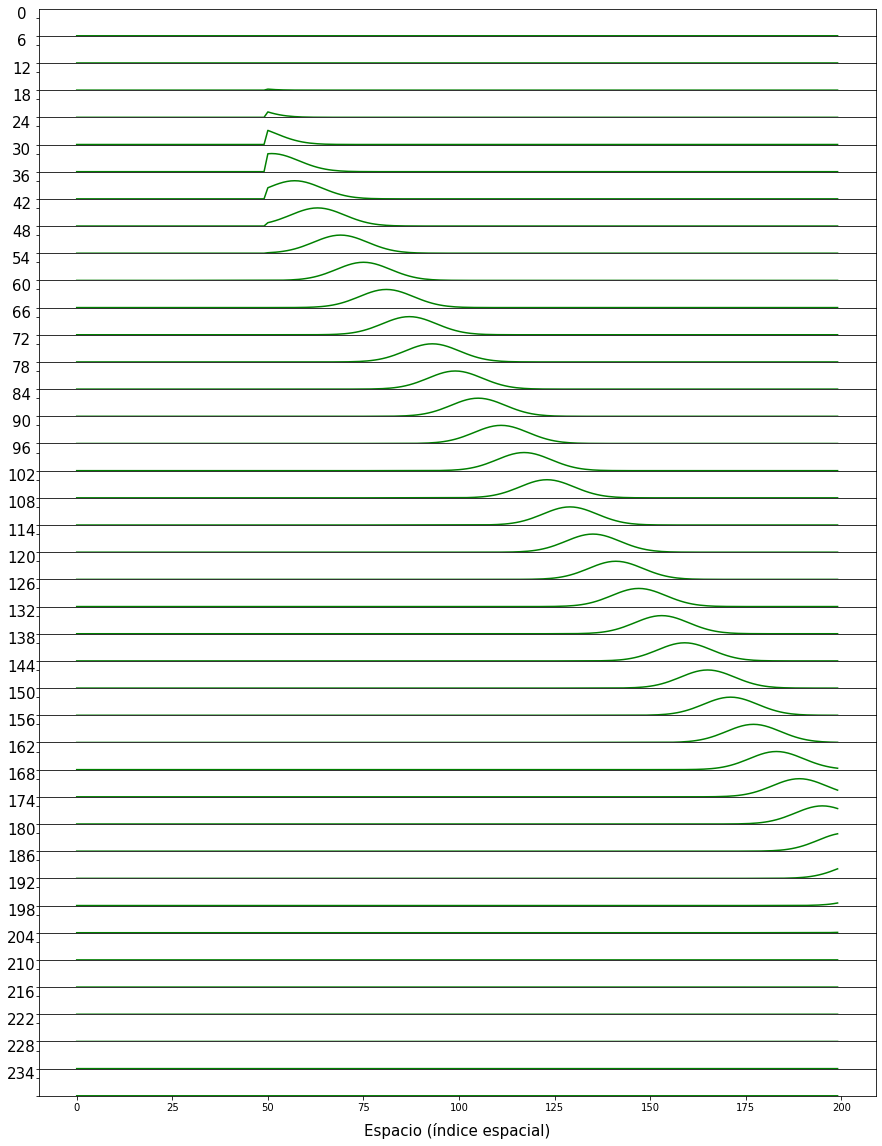

In [ ]:
# Visualización ABC con TFSF
graf(40,timec,index,ezwave,15,20,0,1.5,15,'g')

# 3.11 Inhomogeneidades

Las ecuaciones de actualiazción fueron obtenidas al aproximar las leyes de Faraday y de Ampere. Estas ecuaciones diferenciales pertenecen a un punto, pór lo tanto $\epsilon$ y $\mu$ que aparecen en estas ecuaciones pertenecen a la ubicación de ese nodo. Suponiendo que el número de Courant es 1, pero permitiendo que la permitividad relativa sea función de la posición, las ecuaciones de actualización son

```
ez[m] = ez[m] + (hy[m]-hy[m-1])*imp0/epsR[m]
```





In [ ]:
# Condición simple de frontera absorbente con condición de frontera TFSF entre hy[49] y ez[50]
# Añadiendo inhomogeneidad en la permitividad (er = 9)


# Constantes
timec   = 450     # Pasos temporales
size    = 200     # Nodos espaciales
imp0    = 377     # Impedancia del espacio vacío
center  = 30      # Centro del pulso Gaussiano
width   = 100     # Controla el ancho del pulso Gaussiano
                  # Entre mayor sea, mas ancho sera el pulso
NumSnapshots = 20 # Número de instantaneas en el gráfico                  

# Operaciones para generar la red de los campos
time= np.arange(0,timec,1)        # vector de pasos temporales start = 0, end = timec-1
index = np.arange(0,size,1)       # vector de nodos espaciales start = 0, end = size-1
ez = np.zeros(size)               # red de campo eléctrico, 199 nodos  
hy = np.zeros(size-1)             # red de campo magnético, 198 nodos
ezwave = np.zeros((timec,size))   # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size-1))   # por cada paso temporal existe un renglon, por cada nodo existe una columna
EpsR = np.zeros(size)             # Inicialización de la red que contendra los valores de la permitvidad rel.

# Asignando valores a los nodos de la permitividad relativa

limit = 100             # Indica en que nodo cambia el valor
EpsV1 = 1               # Indica el valor de la permitividad relativa en los nodos anteriores al límite
EpsV2 = 9               # Indica el valor de la permitividad relativa en los nodos posteriores al límite
EpsR[0:limit] = EpsV1   # Se asignan los valores en los nodos
EpsR[limit:]  = EpsV2


for i in time:
  for k in range(0,size-1):                           # Para cada k desde 0 hasta 198
    hy[k] += (ez[k+1]-ez[k])/imp0          
  hy[49] -= mh.exp(-((i-center)**2)/width)/imp0       # Correción para el campo Hy adyacente a la forntera TFSF
  ez[0]=ez[1];                                        # ABC para el nodo ez[0] y ez[size-1]
  ez[size-1]=ez[size-2]
  for k in range(1,size-1):                           # Para cada k desde 0 hasta 199
    ez[k] = ez[k] + (hy[k]-hy[k-1])*imp0/EpsR[k]  
  ez[50] += mh.exp(-((i+0.5-(-0.5)-center)**2)/width) # Correción para el campo Ez adyacente a la forntera TFSF
  ezwave[i,:] = ez
  hywave[i,:] = hy 

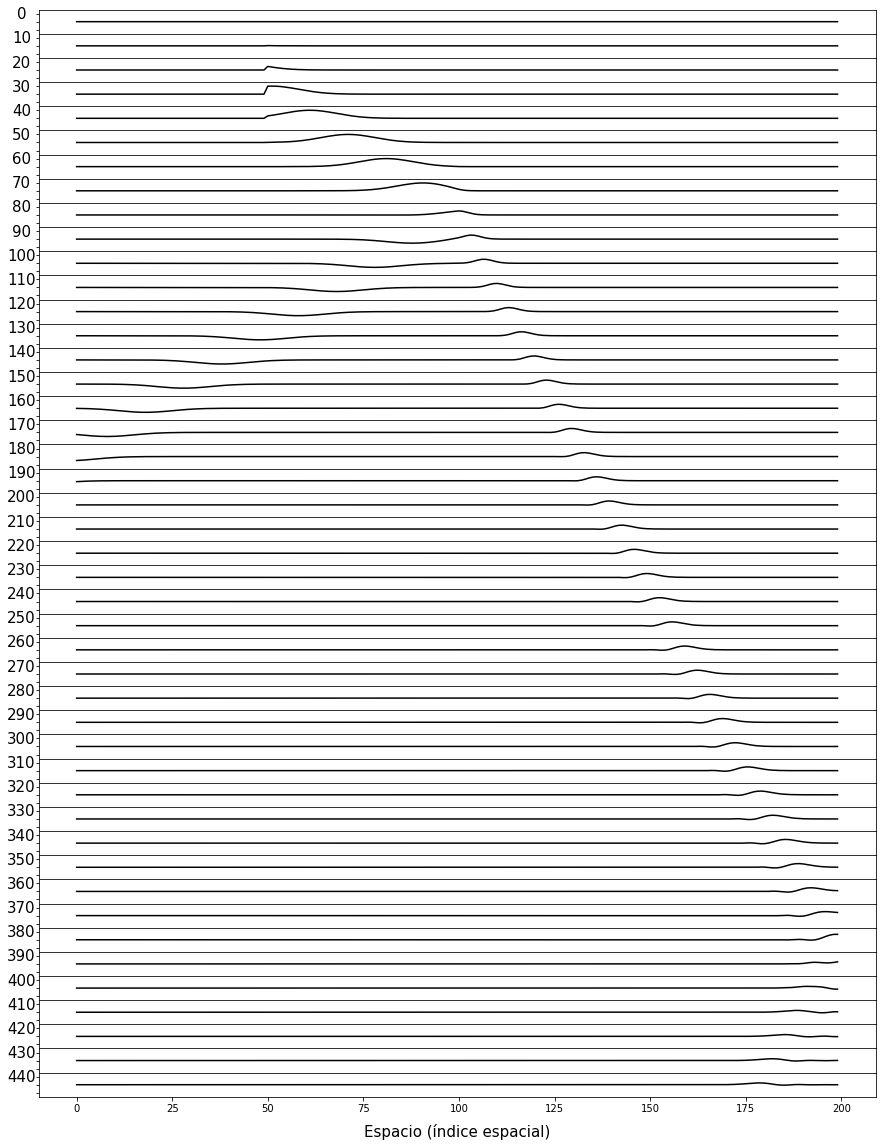

In [ ]:
# Visualización ABC con TFSF e inhomogeneidad
graf(45,timec,index,ezwave,15,20,-1.5,1.5,15,'k')

El pulso en el dieléctrico viaja más despacio que el pulso que viaja en el espacio vacío, pues con una permitividad relativa dfe 9, la velociada de la luz debe ser un tercio de lo que seria en el espacio libre. Cuando la onda reflejada encuentra la frontera izquierda, esta onda desaparece, por otra parte cuando la onda encuentra la frontera derecha, esta onda no es completamente absorbida. Esto debido a que la frontera tipo ABC se construyo tomando como referencia que la onda viaja un paso espacial por cada paso temporal. Sin embargo en el dieléctrico la onda viaja un tercio (er = 9) la onda viaja 1/3 de lo que viajaria en el espacio libre. Por lo tanto es necesario reformular la implementación de la condición ABC.

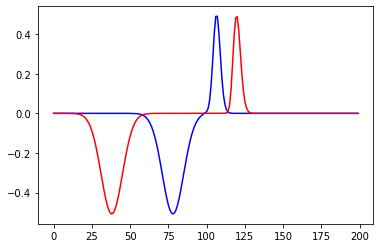

In [ ]:
plt.plot(index,wave[100,:],'b')
plt.plot(index,wave[140,:],'r')


## 3.12 Material conductor 

Cuando un material tiene una conductividad finita, un térmiono de corriente es agregado a la ley de Ampere (diferente del término fuente de corriente mencionado anteriormente) 

$
\sigma\vec{E} + \epsilon \dfrac{\partial \vec{E}}{\partial t}  = \nabla \times \vec{H}
$

Asumiendo solo una componente en el ej $z$ y dependencia en el eje $x$, esta ecuación se reduce a 

$
\sigma E_{z} + \epsilon \dfrac{\partial E_{z}}{\partial t} = \dfrac{\partial H_{y}}{\partial x}
$

Expandiendo esta ecuación con respecto al punto $ (m \Delta_{x},(q + 1/2)\Delta_{t}) $. Sin embargo cuando el medio conductor esta presente, el campo no derivado que aparece a la izquierda no se puede calcular debido a que no hay campo eléctrico en $ (m \Delta_{x},(q + 1/2)\Delta_{t}) $. Este problema puede ser afrontado usando un promedio del campo eléctrico en cada lado del nodo


$
E_{z}^{q + 1/2}[m]  \approx \dfrac{E_{z}^{q+1}+ E_{z}^{q}}{2}
$

sustituyendo y despejando para el campo eléctrico se obtiene


![image](https://drive.google.com/uc?export=view&id=1bruz_aaVdql5eR55-q365uLJwSMMp7fI)




In [ ]:
# Medio conductor 
# Condición simple de frontera absorbente con condición de frontera TFSF entre hy[49] y ez[50]
# Añadiendo inhomogeneidad en la premitividad



# Constantes
timec   = 450     # Pasos temporales
size    = 200     # Nodos espaciales
imp0    = 377     # Impedancia del espacio vacío
center  = 30      # Centro del pulso Gaussiano
width   = 100     # Controla el ancho del pulso Gaussiano
                  # Entre mayor sea, mas ancho sera el pulso
NumSnapshots = 20 # Número de instantaneas en el gráfico     
loss = 0.01             

# Operaciones para generar la red de los campos
time= np.arange(0,timec,1)        # vector de pasos temporales start = 0, end = timec-1
index = np.arange(0,size,1)       # vector de nodos espaciales start = 0, end = size-1
ez = np.zeros(size)               # red de campo eléctrico, 199 nodos  
hy = np.zeros(size-1)             # red de campo magnético, 198 nodos
ezwave = np.zeros((timec,size))   # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size-1))   # por cada paso temporal existe un renglon, por cada nodo existe una columna
ceze = np.zeros(size)               # Inicialización de la red que contendra los valores de los coeficientes
cezh = np.zeros(size)           

# Asignando valores a los nodos de la permitividad relativa

limit = 100             # Indica en que nodo cambia el valor
ceze[0:limit] = 1       # Se asignan los valores en los nodos
cezh[0:limit]  = imp0

ceze[limit:]  = (1-loss)/(1+loss)
cezh[limit:] = (imp0/9)/(1+loss)

for i in time:
  for k in range(0,size-1):                           # Para cada k desde 0 hasta 198
    hy[k] += (ez[k+1]-ez[k])/imp0          
  hy[49] -= mh.exp(-((i-center)**2)/width)/imp0       # Correción para el campo Hy adyacente a la forntera TFSF
  ez[0]=ez[1]                                        # ABC solo para el nodo ez[0] debido a que no funciona para el nodo ez[199] 
  for k in range(1,size-1):                           # Para cada k desde 0 hasta 199
    ez[k] = ceze[k]*ez[k] + (cezh[k]*(hy[k]-hy[k-1]))  
  ez[50] += mh.exp(-((i+0.5-(-0.5)-center)**2)/width) # Correción para el campo Ez adyacente a la forntera TFSF
  ezwave[i,:] = ez
  hywave[i,:] = hy 

In [ ]:
# Visualización ABC con TFSF e inhomogeneidad con pérdidas
graf(45,timec,index,ezwave,15,25,-1.5,1.5,15,'b')

In [ ]:
# Espacio libre/ medio dieléctrico/ Medio conductor 
# Condición simple de frontera absorbente con condición de frontera TFSF entre hy[49] y ez[50]
# Añadiendo inhomogeneidad en la premitividad
  
# Constantes
timec   = 450     # Pasos temporales
size    = 200     # Nodos espaciales
imp0    = 377     # Impedancia del espacio vacío
center  = 30      # Centro del pulso Gaussiano
width   = 100     # Controla el ancho del pulso Gaussiano
                  # Entre mayor sea, mas ancho sera el pulso
NumSnapshots = 20 # Número de instantaneas en el gráfico     
loss = 0.02             
NodeDilLayer = 100  # región dieléctrica
NodeLossLayer = 180 # región dieléctrica con pérdidas


# Operaciones para generar la red de los campos
time= np.arange(0,timec,1)        # vector de pasos temporales start = 0, end = timec-1
index = np.arange(0,size,1)       # vector de nodos espaciales start = 0, end = size-1
ez = np.zeros(size)               # red de campo eléctrico, 199 nodos  
hy = np.zeros(size-1)             # red de campo magnético, 198 nodos
ezwave = np.zeros((timec,size))   # almacenamiento de los valores del campo eléctrico
hywave = np.zeros((timec,size-1))   # por cada paso temporal existe un renglon, por cada nodo existe una columna
ceze = np.zeros(size)               # Inicialización de la red que contendra los valores de los coeficientes
cezh = np.zeros(size)           
chyh = np.zeros(size-1)
chye = np.zeros(size-1)

ceze[0:NodeDilLayer] = 1
cezh[0:NodeDilLayer] = imp0

ceze[NodeDilLayer:NodeLossLayer]  = 1
cezh[NodeDilLayer:NodeLossLayer] = imp0/9

ceze[NodeLossLayer:] = (1-loss)/(1+loss)
cezh[NodeLossLayer:] = (imp0/9)/(1+loss)



chyh[1:NodeLossLayer] = 1
chye[1:NodeLossLayer] = 1/imp0

chyh[NodeLossLayer:] = (1-loss)/(1+loss)
chye[NodeLossLayer:] = (1/imp0)/(1+loss)


# Actualización de los valores en los nodos
for i in time:
  for k in range(0,size-1):                           # Para cada k desde 0 hasta 198
    hy[k] = chyh[k]*hy[k] + chye[k]*(ez[k+1]-ez[k])         
  hy[49] -= mh.exp(-((i-center)**2)/width)/imp0       # Correción para el campo Hy adyacente a la forntera TFSF
  ez[0]=ez[1]                                         # ABC solo para el nodo ez[0] debido a que no funciona para el nodo ez[199] 
  for k in range(1,size-1):                           # Para cada k desde 0 hasta 199
    ez[k] = ceze[k]*ez[k] + cezh[k]*(hy[k]-hy[k-1])  
  ez[50] += mh.exp(-((i+0.5-(-0.5)-center)**2)/width) # Correción para el campo Ez adyacente a la forntera TFSF
  ezwave[i,:] = ez
  hywave[i,:] = hy 

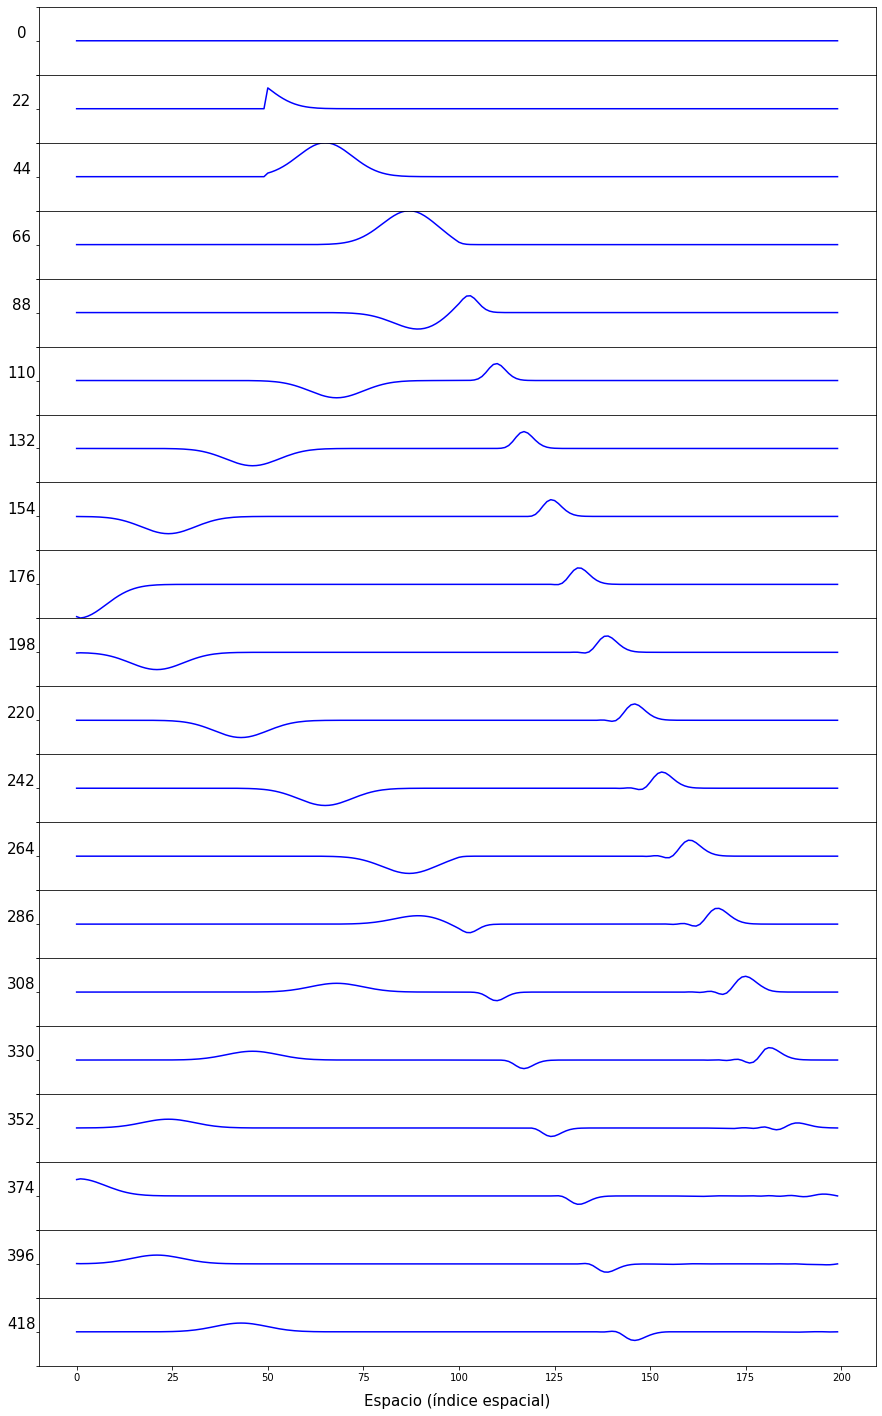

In [ ]:
# Visualización ABC con TFSF, región dieléctrica y región dieléctrica con pérdidas
graf(20,timec,index,ezwave,15,25,-1,1,15,'b')

#Referencias
[1]  Understanding the Finite-Difference Time-Domain Method, John B. Schneider, www.eecs.wsu.edu/~schneidj/ufdtd, 2010.